# UrbanSound machine learning

* The codes : learned from

- youtube video series "Deep Learning (for audio) using Python" -- using librosa
    https://www.youtube.com/watch?v=m3XbqfIij_Y  and more
    
- towarddatasience -- urbansound
   Part1: https://towardsdatascience.com/urban-sound-classification-part-1-99137c6335f9
   PArt2: https://towardsdatascience.com/urban-sound-classification-part-2-sample-rate-conversion-librosa-ba7bc88f209a
    

In [1]:
# marsys -- music genres, folders-- many files.

import pandas as pd
import os
import librosa
import math
import json
import numpy as np

DATASET_PATH = "../../sound-learning/test_reduced_dataset/urbansound_reduced"  # in the video, the files are music files
JASON_PATH = "data.json"

In [2]:
metadata = pd.read_csv(f"{DATASET_PATH}/metadata/UrbanSound8K.csv")

In [3]:
metadata.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [4]:
filename = "7383-3-0-0.wav"
metadata.loc[metadata["slice_file_name"]==filename]

,slice_file_name,fsID,start,end,salience,fold,classID,class
7660,7383-3-0-0.wav,7383,3.9021,7.9021,1,1,3,dog_bark


In [21]:
metadata.loc[metadata["fold"]==1].head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
64,101415-3-0-2.wav,101415,1.000000,5.000000,1,1,3,dog_bark
65,101415-3-0-3.wav,101415,1.500000,5.500000,1,1,3,dog_bark
66,101415-3-0-8.wav,101415,4.000000,8.000000,1,1,3,dog_bark
105,102106-3-0-0.wav,102106,2.243852,3.884477,2,1,3,dog_bark
106,102305-6-0-0.wav,102305,0.000000,2.611610,1,1,6,gun_shot


In [4]:
metadata.loc[metadata["fold"]==1].nunique()

slice_file_name    873
fsID               134
start              488
end                506
salience             2
fold                 1
classID             10
class               10
dtype: int64

In [22]:
import librosa.display
import matplotlib.pyplot as plt
import IPython.display as ipd

def display_wav(signal,fn):
    librosa.display.waveplot(signal, sr=sr)
    plt.xlabel("Time")
    plt.ylabel("Amplitude")
    plt.savefig(fn, Bbox='tight')
    plt.show()

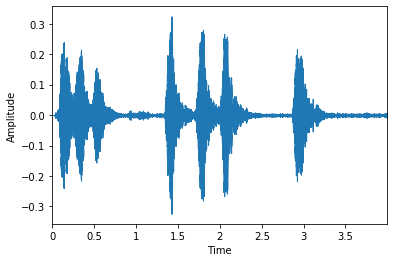

In [23]:
signal, sr = librosa.load("7383-3-0-0.wav", sr=22050)
display_wav(signal, '../images/dog_bark_plot.png')

mfcc shape= (25, 173)


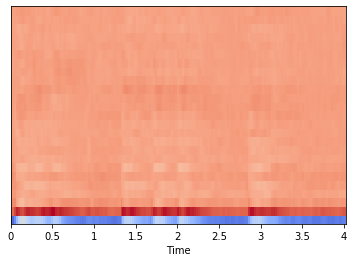

In [25]:
mfccs = librosa.feature.mfcc(signal,sr=sr,n_mfcc=25)
print("mfcc shape=", mfccs.shape)
librosa.display.specshow(mfccs, sr=sr, x_axis='time')
plt.savefig('../images/dog_bark_mfcc_13.png', Bbox='tight')

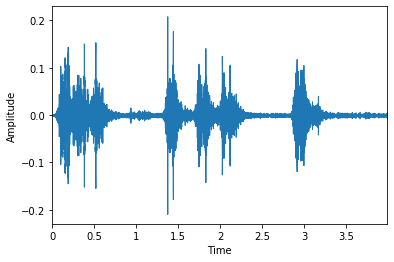

In [24]:
# reconstruct
import soundfile as sf
wav = librosa.feature.inverse.mfcc_to_audio(mfccs)
display_wav(wav, '../images/dog_bark_reversed.png')
sf.write("reversed.wav", wav, sr)